# Feature Selection-Information gain - mutual information In Regression Problem Statements
Mutual Information

Estimate mutual information for a continuous target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

I(X ; Y) = H(X) – H(X | Y)

Where I(X ; Y) is the mutual information for X and Y

H(X) is the entropy for X and 

H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

In [1]:
# Import necessary Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load data

In [2]:
data=pd.read_csv("house.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
data.shape

(1460, 81)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
data.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


## Seprate the numerical features

In [8]:
numerical_cols=['int16','int32','int64','float16','float32','float64']
numerical_cols = list(data.select_dtypes(include=numerical_cols).columns)

In [9]:
numerical_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [10]:
data = data[numerical_cols]

In [11]:
# Drop unique feature
data.drop('Id',axis=1,inplace=True)

In [12]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['SalePrice'],axis=1),
                                                   data['SalePrice'], test_size=0.30, random_state=45)

In [13]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
202,50,50.0,7000,6,6,1924,1950,0.0,617,0,...,398,0,0,126,0,0,0,0,5,2006
417,70,86.0,22420,6,6,1918,1950,0.0,1128,0,...,864,0,0,0,0,0,0,0,11,2007
363,160,21.0,1680,6,8,1972,2007,510.0,162,0,...,264,250,0,0,0,0,0,0,5,2009
1428,30,60.0,7200,5,7,1940,1992,294.0,510,0,...,240,0,0,154,0,0,0,0,2,2010
1003,90,NaN,11500,5,6,1976,1976,164.0,0,0,...,528,0,0,0,0,0,0,0,6,2007


In [14]:
y_test.head()

285     164700
872     116000
343     266000
403     258000
1322    190000
Name: SalePrice, dtype: int64

## Mutual information in regression

In [15]:
from sklearn.feature_selection import mutual_info_regression

# Determine the mutual info
mutual = mutual_info_regression(X_train.fillna(0),y_train)
mutual

array([0.29115978, 0.2386273 , 0.17330886, 0.56017116, 0.10206649,
       0.32566545, 0.23571498, 0.09664839, 0.1354438 , 0.00404224,
       0.13182809, 0.38976672, 0.30437361, 0.19414777, 0.00348969,
       0.47337381, 0.00669291, 0.01434495, 0.27386436, 0.08356304,
       0.05287041, 0.00473816, 0.20671169, 0.15600109, 0.1874935 ,
       0.33510768, 0.34659735, 0.07619388, 0.16469456, 0.04304975,
       0.01667638, 0.0128127 , 0.        , 0.0031332 , 0.02172409,
       0.01850618])

In [16]:
# Convert into the series
mutual=pd.Series(mutual)

# Getting the index feature of all values
mutual.index = X_train.columns

# Get highest point first
mutual.sort_values(ascending=False)

OverallQual      0.560171
GrLivArea        0.473374
TotalBsmtSF      0.389767
GarageArea       0.346597
GarageCars       0.335108
YearBuilt        0.325665
1stFlrSF         0.304374
MSSubClass       0.291160
FullBath         0.273864
LotFrontage      0.238627
YearRemodAdd     0.235715
TotRmsAbvGrd     0.206712
2ndFlrSF         0.194148
GarageYrBlt      0.187493
LotArea          0.173309
OpenPorchSF      0.164695
Fireplaces       0.156001
BsmtFinSF1       0.135444
BsmtUnfSF        0.131828
OverallCond      0.102066
MasVnrArea       0.096648
HalfBath         0.083563
WoodDeckSF       0.076194
BedroomAbvGr     0.052870
EnclosedPorch    0.043050
MoSold           0.021724
YrSold           0.018506
3SsnPorch        0.016676
BsmtHalfBath     0.014345
ScreenPorch      0.012813
BsmtFullBath     0.006693
KitchenAbvGr     0.004738
BsmtFinSF2       0.004042
LowQualFinSF     0.003490
MiscVal          0.003133
PoolArea         0.000000
dtype: float64

<AxesSubplot:>

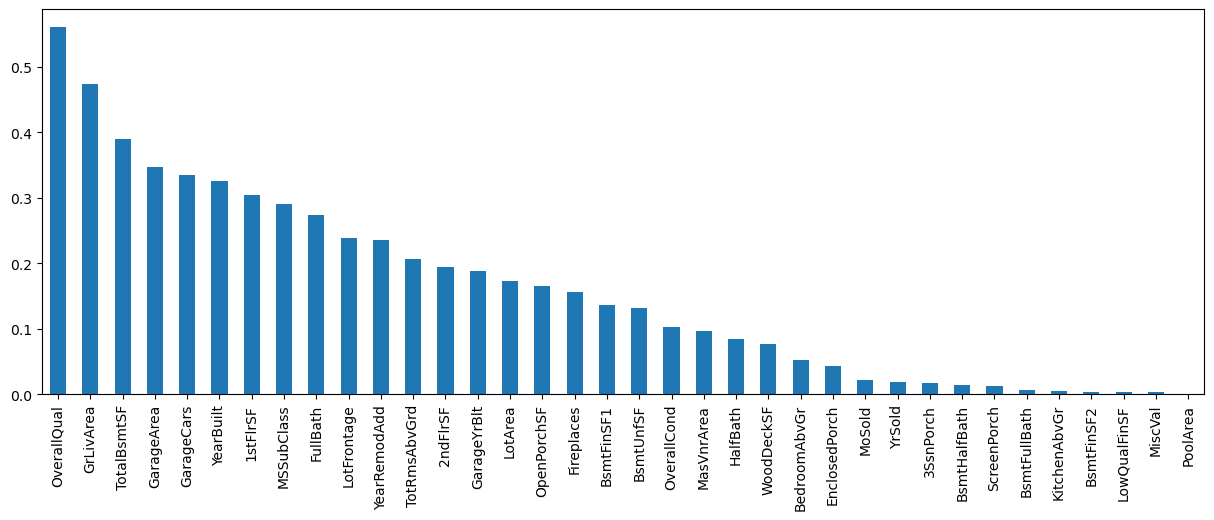

In [17]:
mutual.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [19]:
# Select the feature with the help of percentile
from sklearn.feature_selection import SelectPercentile

# Select top 20 percentile
top_feature = SelectPercentile(mutual_info_regression, percentile=20)
top_feature.fit(X_train.fillna(0),y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x00000153DA5E1AF0>)

In [20]:
# Get all feature that have been 20 percentile
X_train.columns[top_feature.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

## Difference Between Information Gain And Mutual Information
I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.

 